## Assignment

In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'studentsperformance'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

### Import and Instantiate

In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import seaborn as sns
%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
                        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance', con=engine)

engine.dispose()

### Basic Analysis

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
def box_hist(series):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.boxplot(series)
    plt.title('boxplot')
    plt.subplot(122)
    plt.hist(series)
    plt.title('histogram')

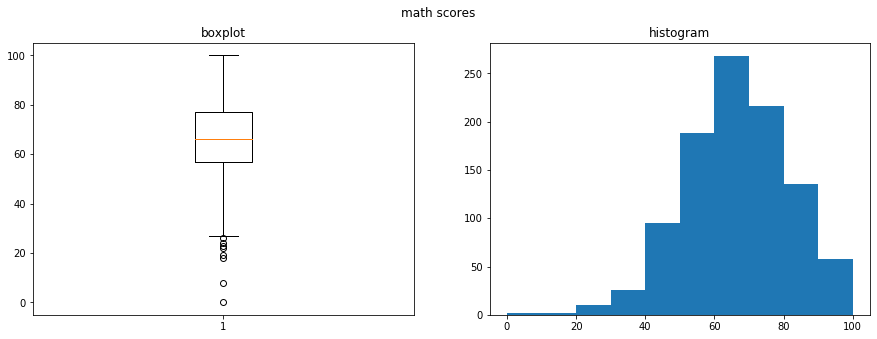

In [7]:
box_hist(df['math score'])
plt.suptitle('math scores')
plt.show()

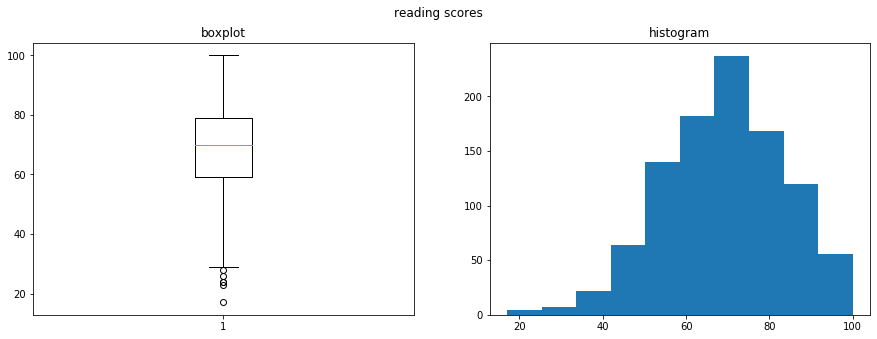

In [8]:
box_hist(df['reading score'])
plt.suptitle('reading scores')
plt.show()

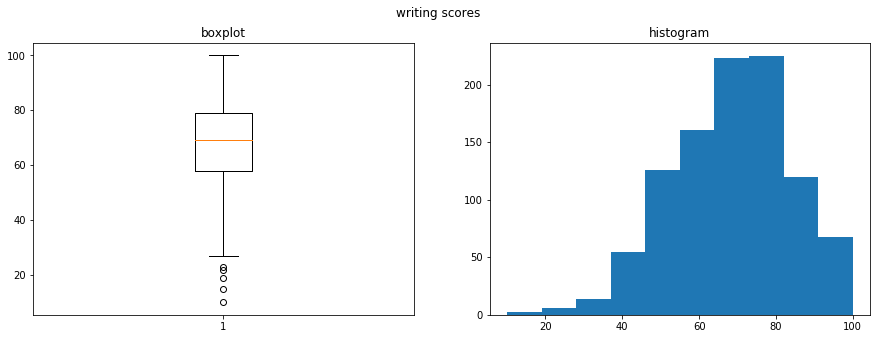

In [9]:
box_hist(df['writing score'])
plt.suptitle('writing scores')
plt.show()

Looks like there are a handful of potential outliers for each category - perhaps not enough to justify getting rid of them.

### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

3 categories - 3 continuous (9 total relationships to be tested)

In [10]:
df.groupby('gender').agg(['mean','count'])

math score       reading score       writing score      
             mean count          mean count          mean count
gender                                                         
female  63.633205   518     72.608108   518     72.467181   518
male    68.728216   482     65.473029   482     63.311203   482

In [11]:
df.groupby('race/ethnicity').agg(['mean','count'])

math score       reading score       writing score      
                     mean count          mean count          mean count
race/ethnicity                                                         
group A         61.629213    89     64.674157    89     62.674157    89
group B         63.452632   190     67.352632   190     65.600000   190
group C         64.463950   319     69.103448   319     67.827586   319
group D         67.362595   262     70.030534   262     70.145038   262
group E         73.821429   140     73.028571   140     71.407143   140

In [12]:
df.groupby('parental level of education').agg(['mean','count'])

math score       reading score        \
                                  mean count          mean count   
parental level of education                                        
associate's degree           67.882883   222     70.927928   222   
bachelor's degree            69.389831   118     73.000000   118   
high school                  62.137755   196     64.704082   196   
master's degree              69.745763    59     75.372881    59   
some college                 67.128319   226     69.460177   226   
some high school             63.497207   179     66.938547   179   

                            writing score        
                                     mean count  
parental level of education                      
associate's degree              69.896396   222  
bachelor's degree               73.381356   118  
high school                     62.448980   196  
master's degree                 75.677966    59  
some college                    68.840708   226  
some high school                64.888268   179

In [13]:
cat_vars = list(df.columns)[0:3]

In [14]:
def three_bars(cat, rot=0):
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    x = sns.barplot(cat, 'math score', data=df)
    for item in x.get_xticklabels():
        item.set_rotation(rot)
    plt.subplot(132)
    y = sns.barplot(cat, 'reading score', data=df)
    for item in y.get_xticklabels():
        item.set_rotation(rot)
    plt.subplot(133)
    z = sns.barplot(cat, 'writing score', data=df)
    for item in z.get_xticklabels():
        item.set_rotation(rot)
    plt.show()

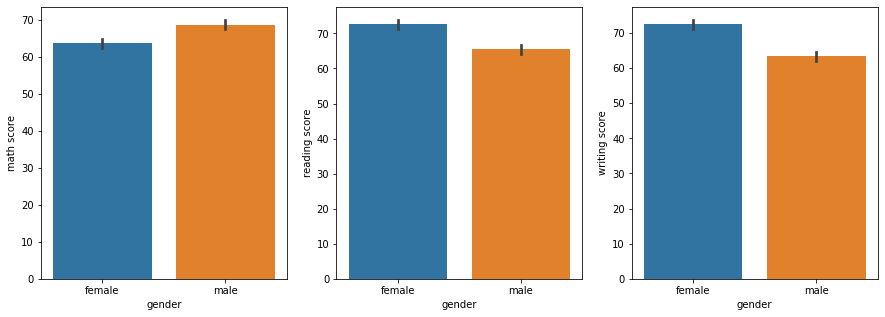

In [15]:
three_bars('gender')

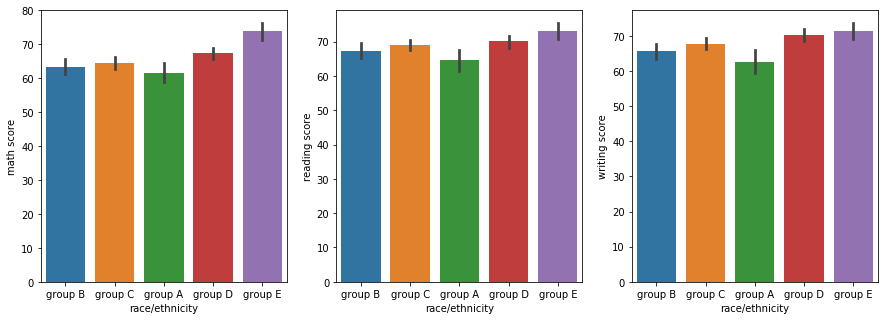

In [16]:
three_bars(cat_vars[1])

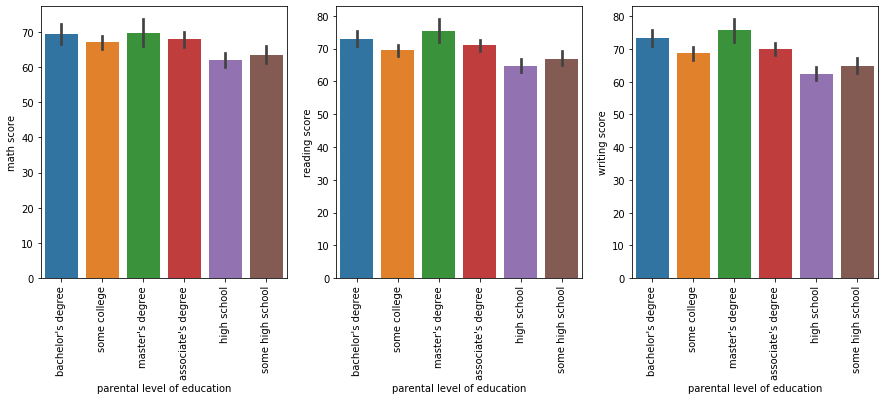

In [17]:
three_bars(cat_vars[2], 90)

Based on the visualizations, it doesn't appear there is a vary large difference between any of these categories - however, there are certain relationships that can be found among these categories and scores. Especially in the parental level of education section, where rank is pretty standard throughout.

Quick T-test comparisons:

In [18]:
def significance(cat):
    uniques = df[cat].unique()
    for var in ['math score', 'reading score', 'writing score']:
        print("------------------------------------------------")
        print("Comparisons for variable: {}".format(var))
        print("------------------------------------------------")
        for i in range(0, len(uniques)):
            for j in range(i+1, len(uniques)):
                print("t-test between groups {0} and {1}:".format(uniques[i], uniques[j]))
                print(stats.ttest_ind(
                    df[df[cat]==uniques[i]][var], 
                    df[df[cat]==uniques[j]][var]
                ))

In [19]:
significance('gender')

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


Would appear the differences between male and female is significant for all types of scores.

In [20]:
significance(cat_vars[1])

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.0048861971371041936)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.00794604749797e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588041)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


In terms of ethnicity, we see that sometimes the difference is significant while other times it is not.

In [21]:
significance(cat_vars[2])

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843372e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

The most interesting thing about the parental level of education differences is that kids who had parents with any sort of college experience generally get higher scores than those with no college experience at all and those differences are generally significant.

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

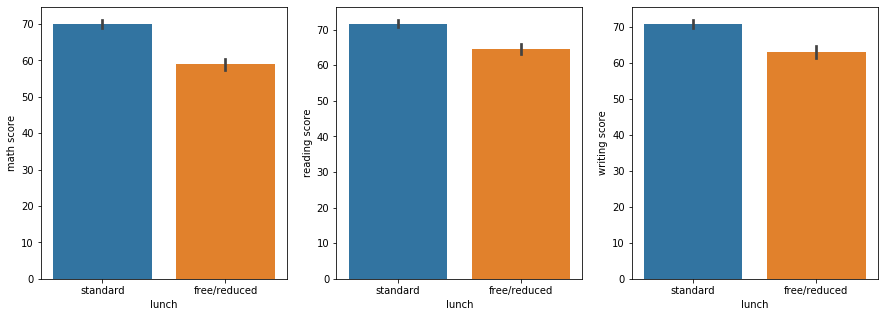

In [22]:
three_bars('lunch')

In [23]:
significance('lunch')

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.1861895831664765e-15)


It appears that for all three types of scores, those with free/reduced lunch generally perform worse than those with standard lunch. An explanation for this could be that those students with free/reduced lunch come from homes that are not as well off as those paying the standard price. Essentially it more than likely comes down to the income of their household. We can also infer that if a student comes from a lower income household, it is probably more likely that their parents had less education (perhaps only through high school) which from the prior question would make sense.

In [24]:
pd.crosstab(df.lunch, df['parental level of education'])

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
lunch,,,,,,
free/reduced,77,44,70,24,79,61
standard,145,74,126,35,147,118


In [25]:
ed_level = list(df['parental level of education'].unique())
myorder = [5, 4, 1, 3, 0, 2]
ed_level = [ed_level[i] for i in myorder]

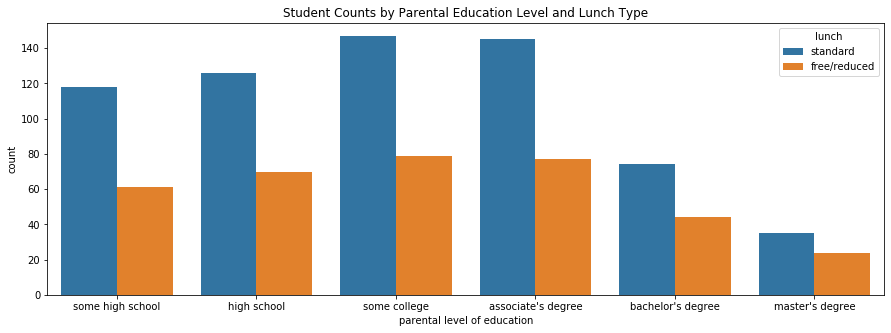

In [26]:
plt.figure(figsize=(15,5))
sns.countplot('parental level of education', hue='lunch', order=ed_level, data=df)
plt.title('Student Counts by Parental Education Level and Lunch Type')
plt.show()

This helps to understand the breakdown of the students by their parent's education and their lunch status. Also indicates that degree/education level for these parent's may not be a good indicator for whether a child is in standard or free/reduced lunch. Perhaps more education doesn't fully equate to higher income.

### 3. Does the test preparation course seem to have an effect on the exam performances?

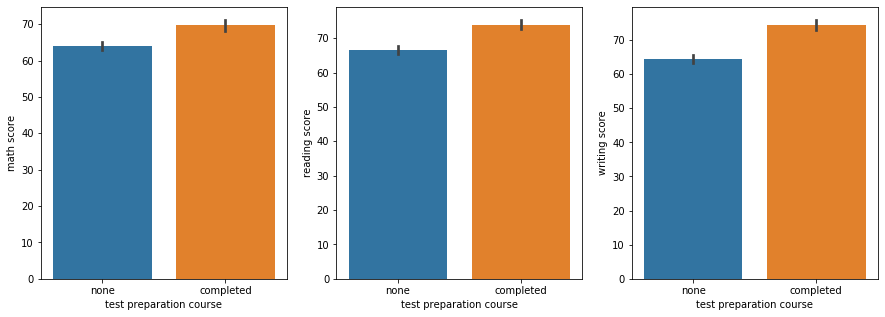

In [27]:
three_bars('test preparation course')

In [28]:
significance('test preparation course')

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


It would appear that the test preparation course did indeed work as intended resulting in higher overall scores with a significant difference from those who did not complete the course.

### 4. Which 2 exam scores are most correlated with each other?

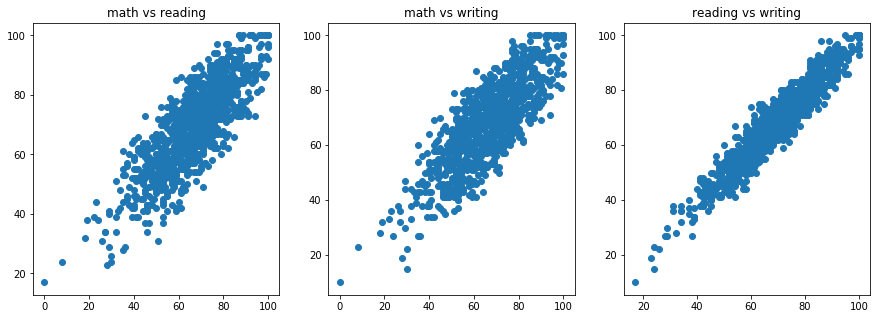

In [29]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(131)
plt.scatter(df['math score'], df['reading score'])
plt.title('math vs reading')
fig.add_subplot(132)
plt.scatter(df['math score'], df['writing score'])
plt.title('math vs writing')
fig.add_subplot(133)
plt.scatter(df['reading score'], df['writing score'])
plt.title('reading vs writing')
plt.show()

In [30]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


All three are positively correlated with one another, but it appears that reading and writing are very correlated with a correlation coefficient of .95!